/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

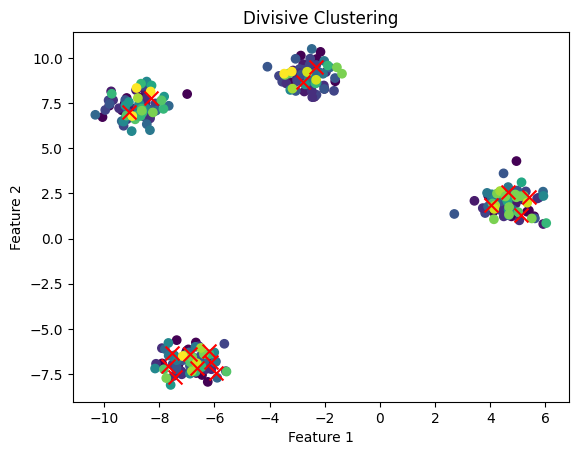

In [1]:
#question 61
from sklearn.base import BaseEstimator, ClusterMixin
from sklearn.cluster import KMeans
import numpy as np

class DivisiveClustering(BaseEstimator, ClusterMixin):
    def __init__(self, n_clusters=2, max_depth=5):
        self.n_clusters = n_clusters
        self.max_depth = max_depth

    def fit(self, X, y=None):
        self.cluster_centers_, self.labels_, self.depth_ = self._divisive_clustering(X, depth=0)
        return self

    def _divisive_clustering(self, X, depth):
        kmeans = KMeans(n_clusters=2)
        labels = kmeans.fit_predict(X)

        if depth == self.max_depth or len(np.unique(labels)) == 1:
            return kmeans.cluster_centers_, labels, depth

        cluster_centers = []
        cluster_labels = []
        for i in range(2):
            cluster_data = X[labels == i]
            sub_cluster_centers, sub_cluster_labels, sub_depth = self._divisive_clustering(cluster_data, depth + 1)
            cluster_centers.extend(sub_cluster_centers)
            cluster_labels.extend(sub_cluster_labels + len(cluster_centers))

        return np.array(cluster_centers), np.array(cluster_labels), depth

# Example usage:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=42)

# Perform divisive clustering
divisive_clusterer = DivisiveClustering(max_depth=3)
divisive_clusterer.fit(X)

# Plot the clustering result
plt.scatter(X[:, 0], X[:, 1], c=divisive_clusterer.labels_, cmap='viridis')
plt.scatter(divisive_clusterer.cluster_centers_[:, 0], divisive_clusterer.cluster_centers_[:, 1], marker='x', color='red', s=100)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Divisive Clustering')
plt.show()


In [2]:
#question 62

import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Download movie_reviews dataset from NLTK
nltk.download('movie_reviews')

# Load movie_reviews dataset
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]

# Shuffle the documents
import random
random.shuffle(documents)

# Define feature extractor
def document_features(document):
    document_words = set(document)
    features = {}
    for word in word_features:
        features['contains({})'.format(word)] = (word in document_words)
    return features

# Get the most common words as features
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]

# Extract features from documents
featuresets = [(document_features(d), c) for (d,c) in documents]

# Split the dataset into train and test sets
train_set, test_set = train_test_split(featuresets, test_size=0.2, random_state=42)

# Train Naive Bayes classifier
classifier = nltk.NaiveBayesClassifier.train(train_set)

# Evaluate classifier
accuracy = nltk.classify.accuracy(classifier, test_set)
print("Accuracy:", accuracy)

# Test the classifier with custom reviews
review1 = "This movie is great!"
review2 = "This movie is terrible!"
print("Review 1:", classifier.classify(document_features(review1.split())))
print("Review 2:", classifier.classify(document_features(review2.split())))


[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.


Accuracy: 0.8025
Review 1: neg
Review 2: neg


In [3]:
#question 63
import numpy as np

class NaiveBayes:
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.parameters.append([])
            for col in X_c.T:
                parameters = {"mean": col.mean(), "var": col.var()}
                self.parameters[i].append(parameters)

    def _pdf(self, X, mean, var):
        return np.exp(-((X - mean) ** 2) / (2 * var)) / np.sqrt(2 * np.pi * var)

    def _predict(self, sample):
        posteriors = []
        for i, c in enumerate(self.classes):
            posterior = np.log(self.priors[i])
            for feature_value, params in zip(sample, self.parameters[i]):
                likelihood = self._pdf(feature_value, params["mean"], params["var"])
                posterior += np.log(likelihood)
            posteriors.append(posterior)
        return self.classes[np.argmax(posteriors)]

    def predict(self, X):
        self.priors = [np.mean(self.y == c) for c in self.classes]
        return [self._predict(sample) for sample in X]

# Example usage:
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([0, 0, 0, 1, 1])

nb = NaiveBayes()
nb.fit(X, y)

X_test = np.array([[1, 2], [4, 5]])
print("Predictions:", nb.predict(X_test))


Predictions: [0, 1]


In [5]:
#question 64

from itertools import combinations

class Apriori:
    def __init__(self, min_support=0.1, min_confidence=0.5):
        self.min_support = min_support
        self.min_confidence = min_confidence

    def _get_itemsets(self, transactions):
        itemsets = {}
        for transaction in transactions:
            for item in transaction:
                if (item,) not in itemsets:
                    itemsets[(item,)] = 0
                itemsets[(item,)] += 1
        return itemsets

    def _get_frequent_itemsets(self, itemsets, total_transactions):
        frequent_itemsets = {}
        for itemset, count in itemsets.items():
            support = count / total_transactions
            if support >= self.min_support:
                frequent_itemsets[itemset] = support
        return frequent_itemsets

    def _generate_candidates(self, itemsets, k):
        candidates = set()
        for itemset1 in itemsets:
            for itemset2 in itemsets:
                union = tuple(sorted(set(itemset1) | set(itemset2)))
                if len(union) == k:
                    candidates.add(union)
        return candidates

    def fit(self, transactions):
        self.transactions = transactions
        self.total_transactions = len(transactions)

        itemsets = self._get_itemsets(transactions)
        frequent_itemsets = self._get_frequent_itemsets(itemsets, self.total_transactions)
        self.rules = {}

        k = 2
        while frequent_itemsets:
            self.rules[k - 1] = frequent_itemsets
            candidates = self._generate_candidates(frequent_itemsets.keys(), k)
            itemsets = self._get_itemsets(candidates)

            frequent_itemsets = self._get_frequent_itemsets(itemsets, self.total_transactions)
            k += 1

    def _get_subsets(self, iterable):
        return [frozenset(subset) for i in range(len(iterable) + 1) for subset in combinations(iterable, i)]

    def _get_confidence(self, rule):
        antecedent, consequent = rule
        antecedent_support = self.rules[len(antecedent)][antecedent]
        rule_support = self.rules[len(antecedent) + 1][rule]
        return rule_support / antecedent_support

    def generate_rules(self):
        rules = []
        for k, frequent_itemsets in self.rules.items():
            if k < 2:
                continue
            for itemset, support in frequent_itemsets.items():
                subsets = self._get_subsets(itemset)
                for antecedent in subsets:
                    consequent = tuple(sorted(set(itemset) - set(antecedent)))
                    if antecedent and consequent:
                        confidence = self._get_confidence((antecedent, consequent))
                        if confidence >= self.min_confidence:
                            rules.append((antecedent, consequent, support, confidence))
        return rules

# Example usage:
transactions = [
    {'apple', 'banana', 'orange'},
    {'banana', 'orange'},
    {'apple', 'banana'},
    {'apple', 'orange'},
    {'apple', 'banana', 'orange'},
    {'apple', 'orange'},
]

apriori = Apriori(min_support=0.3, min_confidence=0.5)
apriori.fit(transactions)
rules = apriori.generate_rules()

for antecedent, consequent, support, confidence in rules:
    print(f"Rule: {antecedent} -> {consequent}, Support: {support}, Confidence: {confidence}")


In [6]:
#question 65

from itertools import combinations

class Apriori:
    def __init__(self, min_support=0.1, min_confidence=0.5):
        self.min_support = min_support
        self.min_confidence = min_confidence

    def _get_itemsets(self, transactions):
        itemsets = {}
        for transaction in transactions:
            for item in transaction:
                if (item,) not in itemsets:
                    itemsets[(item,)] = 0
                itemsets[(item,)] += 1
        return itemsets

    def _get_frequent_itemsets(self, itemsets, total_transactions):
        frequent_itemsets = {}
        for itemset, count in itemsets.items():
            support = count / total_transactions
            if support >= self.min_support:
                frequent_itemsets[itemset] = support
        return frequent_itemsets

    def _generate_candidates(self, itemsets, k):
        candidates = set()
        for itemset1 in itemsets:
            for itemset2 in itemsets:
                union = tuple(sorted(set(itemset1) | set(itemset2)))
                if len(union) == k:
                    candidates.add(union)
        return candidates

    def fit(self, transactions):
        self.transactions = transactions
        self.total_transactions = len(transactions)

        itemsets = self._get_itemsets(transactions)
        frequent_itemsets = self._get_frequent_itemsets(itemsets, self.total_transactions)
        self.rules = {}

        k = 2
        while frequent_itemsets:
            self.rules[k - 1] = frequent_itemsets
            candidates = self._generate_candidates(frequent_itemsets.keys(), k)
            itemsets = self._get_itemsets(candidates)

            frequent_itemsets = self._get_frequent_itemsets(itemsets, self.total_transactions)
            k += 1

    def _get_subsets(self, iterable):
        return [frozenset(subset) for i in range(len(iterable) + 1) for subset in combinations(iterable, i)]

    def _get_confidence(self, rule):
        antecedent, consequent = rule
        antecedent_support = self.rules[len(antecedent)][antecedent]
        rule_support = self.rules[len(antecedent) + 1][rule]
        return rule_support / antecedent_support

    def generate_rules(self):
        rules = []
        for k, frequent_itemsets in self.rules.items():
            if k < 2:
                continue
            for itemset, support in frequent_itemsets.items():
                subsets = self._get_subsets(itemset)
                for antecedent in subsets:
                    consequent = tuple(sorted(set(itemset) - set(antecedent)))
                    if antecedent and consequent:
                        confidence = self._get_confidence((antecedent, consequent))
                        if confidence >= self.min_confidence:
                            rules.append((antecedent, consequent, support, confidence))
        return rules

# Example usage:
transactions = [
    {'book1', 'book2', 'book3'},
    {'book2', 'book3'},
    {'book1', 'book2'},
    {'book1', 'book3'},
    {'book1', 'book2', 'book3'},
    {'book1', 'book3'},
]

apriori = Apriori(min_support=0.3, min_confidence=0.5)
apriori.fit(transactions)
rules = apriori.generate_rules()

for antecedent, consequent, support, confidence in rules:
    print(f"Rule: {antecedent} -> {consequent}, Support: {support}, Confidence: {confidence}")
